<a href="https://colab.research.google.com/github/nv0233/Nishanth_INFO5731_Spring2020/blob/main/Copy_of_Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (02/17/2022, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import PlaintextCorpusReader
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

#1)
path = os.listdir("///content/gdrive/MyDrive/preprocessed_cases[cases_29404]")
print('{} categories are present'.format(len(path)))

#2)
for i in path:
  docs = os.listdir("//content/gdrive/MyDrive/preprocessed_cases[cases_29404]/{}".format((i)))
  print('In file {} we have {} documents'.format(i,len(docs)))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
76 categories are present
In file 1 we have 20 documents
In file 10 we have 584 documents
In file 11 we have 605 documents
In file 12 we have 0 documents
In file 13 we have 0 documents
In file 14 we have 277 documents
In file 15 we have 257 documents
In file 16 we have 0 documents
In file 17 we have 0 documents
In file 18 we have 0 documents
In file 19 we have 349 documents
In file 2 we have 186 documents
In file 20 we have 0 documents
In file 21 we have 0 docume

In [ ]:
#3)
import pandas as pd
sum = 0
for i in path:
    #print(i)
    docs = os.listdir("//content/gdrive/MyDrive/preprocessed_cases[cases_29404]/{}".format((i)))
    #print(docs)
    try:
        for file in docs:
            filepath = os.path.join("//content/gdrive/MyDrive/preprocessed_cases[cases_29404]", i, file)
            data = pd.read_csv(filepath, sep="\t")
            sum += data.shape[0]
        #print(sum)
    except:
        print(i, file)
print("The average no of sentences in all categories is:", round(sum/78, 2))
print("The average no of sentences in all files is:", round(sum/29404, 2))

The average no of sentences in all categories is: 1767.76
The average no of sentences in all files is: 4.69


In [ ]:
#4)
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
sum = 0
for folder in path:
    docs = os.listdir("//content/gdrive/MyDrive/preprocessed_cases[cases_29404]/{}".format((folder)))
    try:
        for file in docs:
            filepath = os.path.join("/content/gdrive/MyDrive/preprocessed_cases[cases_29404]", folder, file)
            data = pd.read_csv(filepath, sep="\t")
            for col in data.columns:
                data[col] = data[col].apply(lambda x: [item for item in x.split() if ((item not in stop) and (len(item)!= 1))])
                
                for sent in data[col]:
                    sum += len(sent)
        #print(sum)
    except Exception as e:
        print(e)
        #print(i, file)
print("The average no of words in all categories is:", round(sum/78, 2))
print("The average no of words in all files is:", round(sum/29404, 2))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
The average no of words in all categories is: 106496.05
The average no of words in all files is: 282.5


In [ ]:
!pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=b51af93557c3a729d297942a33ff5df24ef80ea55bd8abfdd5a19f8ee285c06a
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
#5)
import re
import pandas as pd
from stop_words import get_stop_words
from nltk.corpus import stopwords
import nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

# creating a set of stop words that are obtained from STOPWORDS and stop_words
STOPWORDS = set(stopwords.words('english'))
stop_words = list(get_stop_words('en'))
# we combien both sets of stopwords to make a corpus of stopwords
stopwords = list(set(list(STOPWORDS)) | set(list(stop_words)))
stopwords = [re.sub('[^a-zA-Z0-9]+', '', word) for word in stopwords]
print(len(stopwords))
import os

list_of_words = []
path = os.listdir("//content/gdrive/MyDrive/preprocessed_cases[cases_29404]")
# we loop through each file and create a list of words
for folder in path:
    docs = os.listdir("/content/gdrive/MyDrive/preprocessed_cases[cases_29404]/{}".format((folder)))
    try:
        for file in docs:
            filepath = os.path.join("/content/gdrive/MyDrive/preprocessed_cases[cases_29404]", folder, file)
            
            data = pd.read_csv(filepath, sep="\t")
            for col in data.columns:
                data[col] = data[col].str.lower()
                data[col] = data[col].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))
                data[col] = data[col].apply(lambda x: " ".join(item for item in x.split() if ((item not in stopwords) and (len(item)!= 1))))
                
                for sent in data[col]:
                    list_of_words.extend(sent.split())
       
    except Exception as e:
        print(e)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
211


In [ ]:
from collections import Counter
# we get the top 50 unique terms and their count
(Counter(list_of_words).most_common(50))

[('court', 128881),
 ('district', 55644),
 ('state', 34270),
 ('also', 31697),
 ('whether', 27833),
 ('may', 27706),
 ('class', 27313),
 ('evidence', 25825),
 ('law', 25574),
 ('states', 23834),
 ('must', 23786),
 ('federal', 23341),
 ('action', 22935),
 ('case', 22568),
 ('plaintiffs', 21426),
 ('claims', 21338),
 ('claim', 20559),
 ('united', 20558),
 ('trial', 20254),
 ('act', 19901),
 ('one', 19263),
 ('judgment', 18619),
 ('order', 17828),
 ('first', 17307),
 ('rule', 16964),
 ('defendants', 16721),
 ('section', 16680),
 ('plaintiff', 16617),
 ('government', 16320),
 ('defendant', 16174),
 ('issue', 15742),
 ('time', 14861),
 ('new', 14789),
 ('motion', 14668),
 ('two', 14623),
 ('review', 14271),
 ('use', 14132),
 ('statute', 14129),
 ('public', 13930),
 ('decision', 13877),
 ('right', 13391),
 ('made', 13232),
 ('parties', 13128),
 ('jury', 12882),
 ('filed', 12147),
 ('held', 12138),
 ('water', 12132),
 ('within', 12092),
 ('required', 11914),
 ('found', 11823)]

In [ ]:
from collections import Counter
counter_list = (Counter(list_of_words).most_common(50))

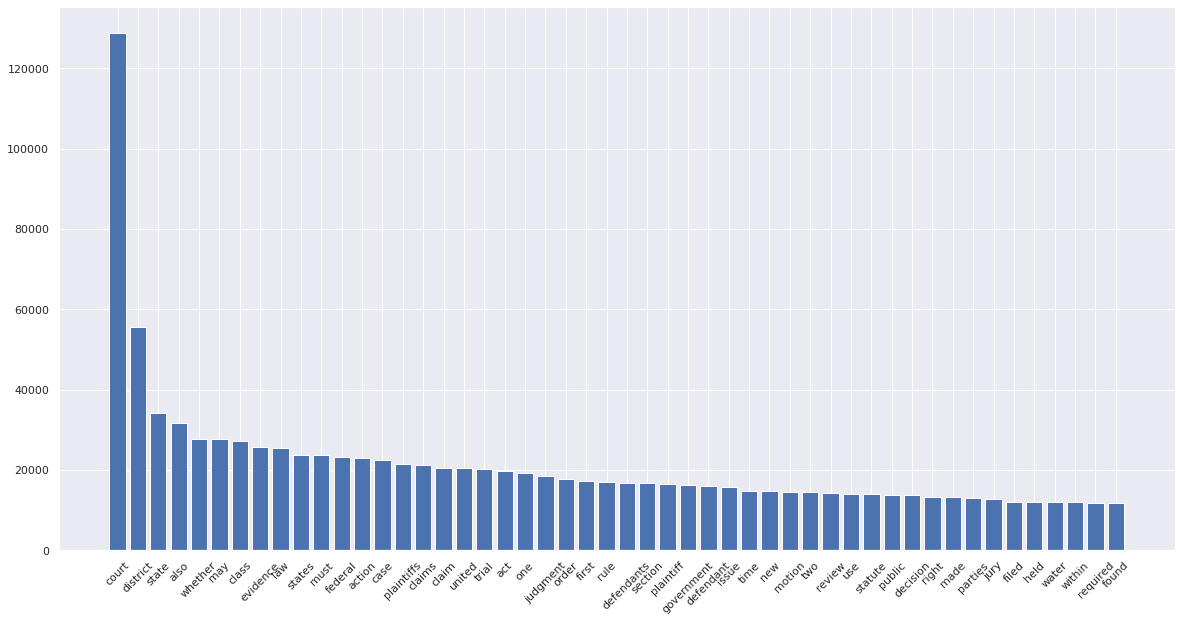

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
plt.bar(dict(counter_list).keys(), dict(counter_list).values())
plt.xticks(rotation =45)
plt.show()
#dict(counter_list).keys()

Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element.

(2) Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best If percentage >= 60 but less than 80 then Very Good If percentage >= 45 but less than 60 then Good If Percentage >= 30 but less than 45 then Pass If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:



In [ ]:
# 1. Your answer here (code + explanation):

import pandas as pd
givenweblink = 'https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab-assignment-04-student-performance.csv'
# getting data from the given git weblink
df_weblink = pd.read_csv(givenweblink)
# getting through each file and finding all the details
for columns in df1.columns:
    print("rows in a given data:", df1[columns].shape[0])
    print(" unique values in the given column:", df1[columns].value_counts().shape[0])
    print(df1[columns].value_counts())
    print()

rows in a given data: 131
 unique values in the given column: 2
1    72
0    59
Name: ge, dtype: int64

rows in a given data: 131
 unique values in the given column: 5
2    57
0    44
4    20
1     6
3     4
Name: cst, dtype: int64

rows in a given data: 131
 unique values in the given column: 4
1    59
3    38
2    25
0     9
Name: tnp, dtype: int64

rows in a given data: 131
 unique values in the given column: 4
1    65
3    44
2    17
0     5
Name: twp, dtype: int64

rows in a given data: 131
 unique values in the given column: 4
3    63
1    53
0     8
2     7
Name: iap, dtype: int64

rows in a given data: 131
 unique values in the given column: 4
1    54
3    42
2    27
0     8
Name: esp, dtype: int64

rows in a given data: 131
 unique values in the given column: 2
0    78
1    53
Name: arr, dtype: int64

rows in a given data: 131
 unique values in the given column: 2
1    92
0    39
Name: ls, dtype: int64

rows in a given data: 131
 unique values in the given column: 2
1    76
0 

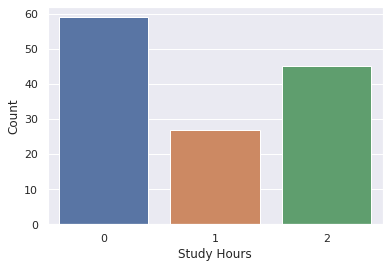

In [ ]:
# 2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(df['sh'])
plt.xlabel("Study Hours")
plt.ylabel("Count")
plt.show()

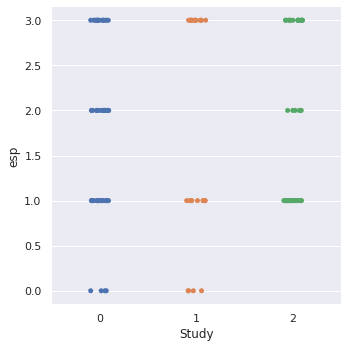

In [ ]:
# 3.)
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df1 = pd.DataFrame()
df1['Study']=pd.DataFrame(df.sh)
df1['esp']=pd.DataFrame(df.esp)
df1['esp'].mask(df1['esp'] == 'Best', 80, inplace=True)
df1['esp'].mask(df1['esp'] == 'Vg', 60, inplace=True)
df1['esp'].mask(df1['esp'] == 'Good', 45, inplace=True)
df1['esp'].mask(df1['esp'] == 'Pass', 30, inplace=True)
df1['esp'].mask(df1['esp'] == 'Fail', 30, inplace=True)
df1['exampercent']=pd.DataFrame(df.esp)
sns.factorplot(x='Study',y='esp', kind = 'strip',data=df1)
plt.show()

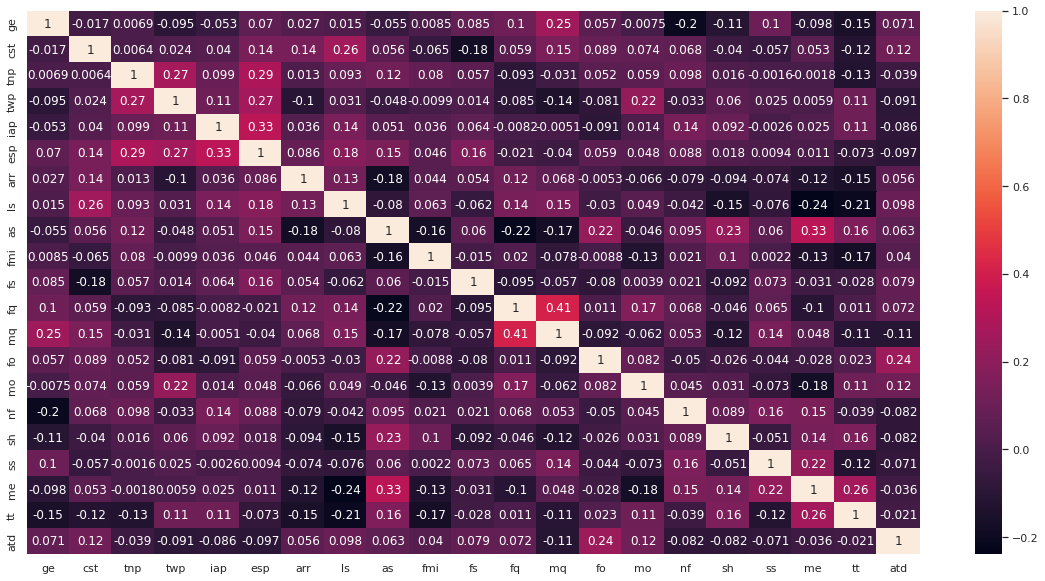

In [ ]:

# 4. imported label encoder 
from sklearn import preprocessing
import seaborn as sns
lb_encoder = preprocessing.LabelEncoder()  
def Encoder(df_weblink):
    colToEncode = list(df_weblink.select_dtypes(include=['category','object']))
    le = preprocessing.LabelEncoder()
    #  categorical columns data into numerical data can be converted
    for feature in colToEncode:
        try:
            df_weblink[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df_weblink

df1 = Encoder(df_weblink)
# we drop the ms column
df1 = df1.drop('ms', axis = 1)

# we get the correlation data
corr = df1.corr()
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(corr,annot=True)
plt.show()

Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

# Your three questions:

'''
I had chosen a height of country EDA dataset.
Here I want to discuess about the following data set.

Q1.)How to rank  male and female in the data set ?

Q2.) whats the ratio for male and female height described by the mean value?

Q3.) sorting data from largest to smaller countries?


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path = '/content/gdrive/MyDrive/Height analysis data set/Height of Male and Female by Country 2022.csv'
da = pd.read_csv(path)
da.drop([da.columns[-1], da.columns[-2]], axis=1, inplace=True)
da.column = ['Rank', 'Country', 'Male', 'Female']

sns.set_theme(rc = {'figure.figsize':(15,8)}, style='white')

In [ ]:
# 1.here we get the male and female ranking
da.describe()

,Rank,Male Height in Cm,Female Height in Cm
count,199.000000,199.000000,199.000000
mean,100.000000,173.089045,160.942915
std,57.590508,4.949832,4.076377
min,1.000000,160.130000,150.910000
25%,50.500000,169.490000,158.240000
50%,100.000000,173.530000,160.620000
75%,149.500000,176.510000,163.870000
max,199.000000,183.780000,170.360000


In [ ]:
#getting top raking of countries of height of male and female
da.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm
0,1,Netherlands,183.78,170.36
1,2,Montenegro,183.30,169.96
2,3,Estonia,182.79,168.66
3,4,Bosnia and Herzegovina,182.47,167.47
4,5,Iceland,182.10,168.91


In [ ]:
#getting fiffernece between male and female ratio
da['Difference'] = data.Male-data.Female

In [ ]:
# Mean difference:
da['Difference'].mean()

12.146130653266331

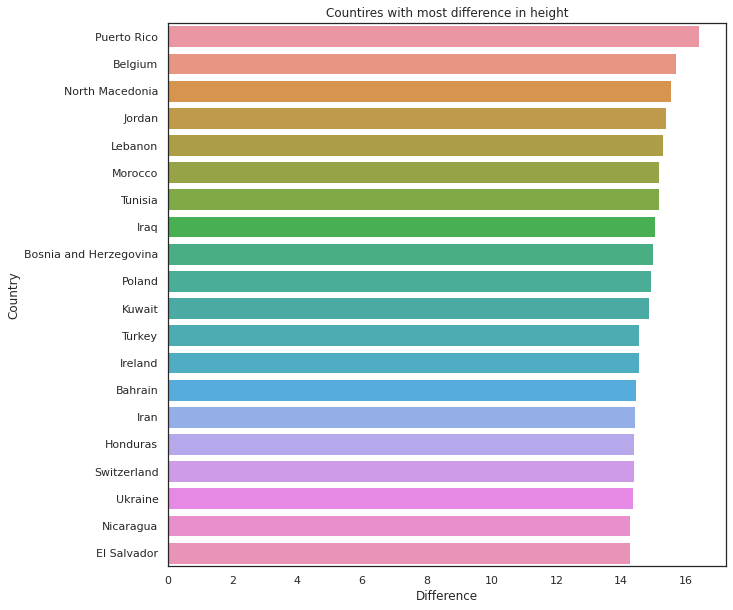

In [ ]:
#2.sorting the data from top rated counties
most_dif_n = 20
top_differences = data.sort_values(by='Difference', ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x=top_differences[:most_dif_n].Difference, y=top_differences[:most_dif_n].Country,ci=False);
plt.title('Countires with most difference in height');

In [ ]:
#taking data of only one country
da[data.Country=='Netherlands']

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Difference
0,1,Netherlands,183.78,170.36,13.42


In [ ]:
print(np.sum(data.Male < 170.36))

62


In [ ]:
#3.getting difference between male and female from different countries
gender = ['Male', 'Female']
sorted_male_height = data.sort_values(by='Male', ascending=False)
sorted_female_height = data.sort_values(by='Female', ascending=False)
sorted_heights = [sorted_male_height, sorted_female_height]
n = 10

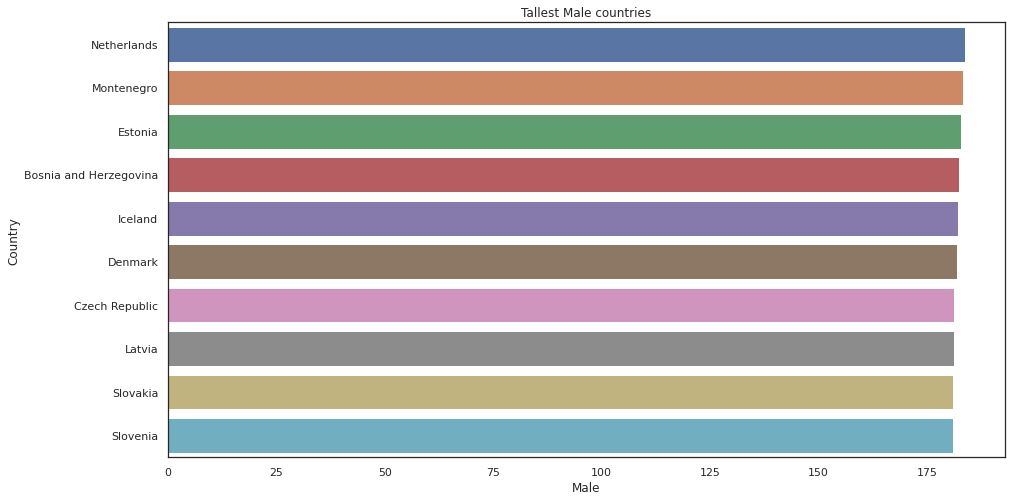

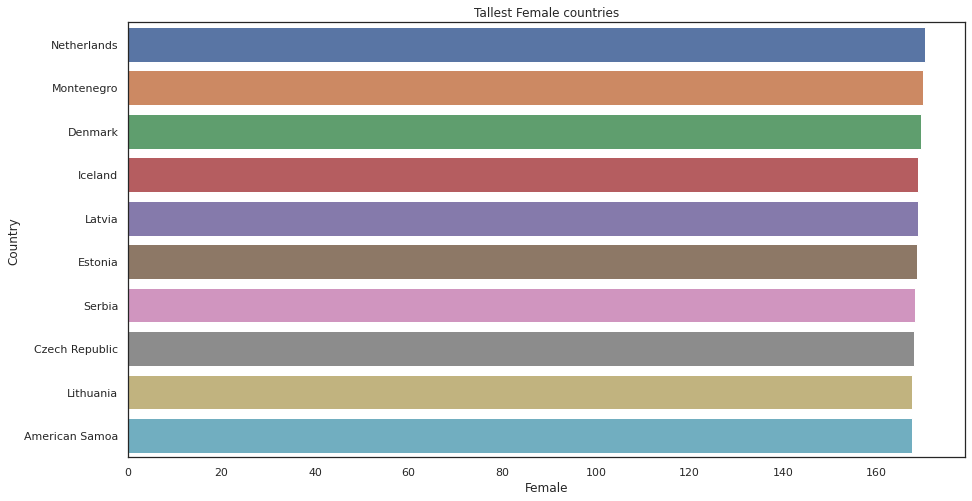

In [ ]:
for i in range(2):
    sns.barplot(x=sorted_heights[i][genders[i]][:n], y=sorted_heights[i].Country[:n], ci=False)
    plt.title('Tallest {} countries'.format(genders[i]))
    plt.show()

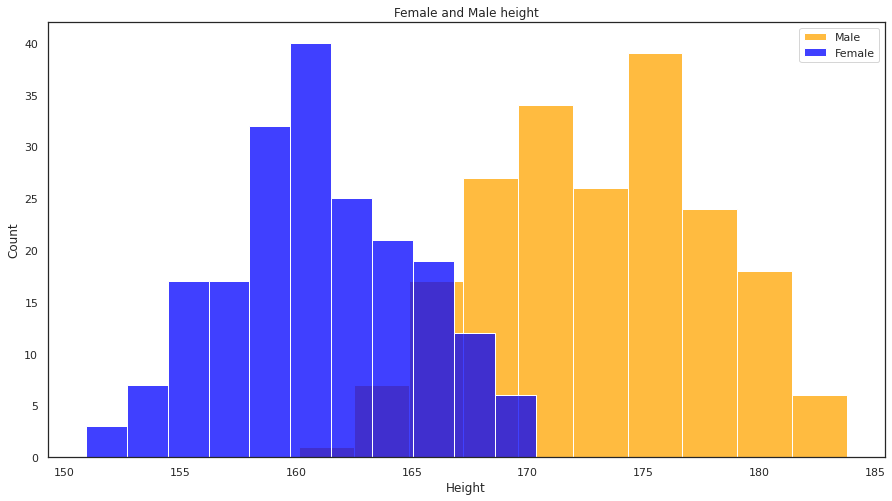

In [ ]:
#getting height and count of male and female
sns.histplot(data.Male, label='Male', color='orange')
sns.histplot(data.Female, label='Female', color='blue')
plt.xlabel('Height')
plt.title('Female and Male height');
plt.legend();